This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/bulk_data/kidney_aging/"

# file downloaded from SeuratData then converted to h5ad 



in_file = f"{data_path}/GSE132040_190214.csv"
meta_file = f"{data_path}/GSE132040_MACA_Bulk_metadata.csv"
results_file = f"{data_path}/liver_bulk_processed.h5ad"

with open(in_file) as your_data:
    adata = ad.read_csv(your_data, delimiter=',')
    adata = adata.transpose()
    
# add in all the metadata
obs_df = pd.read_csv(meta_file)
obs_df = obs_df.set_index(obs_df["Sample name"] + ".gencode.vM19")

# remake anndata
adata = ad.AnnData(adata.X, obs=obs_df, var=adata.var)
adata


AnnData object with n_obs × n_vars = 947 × 54357
    obs: 'Sample name', 'title', 'source name', 'organism', 'characteristics: age', 'characteristics: developmental stage', 'characteristics: sex', 'molecule', 'description', 'processed data file ', 'raw file', 'BioSample', 'Instrument Model'

In [3]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

# remove non-gene IDs
gene_idx = np.where(np.logical_not(adata.var_names.str.startswith('__')))[0]
adata = adata[:, gene_idx]



In [4]:
adata.var_names[np.where(adata.var_names.str.startswith('__'))]

Index([], dtype='object')

In [5]:
# format the tissue 
adata.obs["tissue"] = [x.split("_")[0] for x in adata.obs["source name"]]

# subset to kidney
#adata = adata[np.where(adata.obs["tissue"] == "Kidney")]
adata = adata[np.where(adata.obs["tissue"] == "Liver")]

adata.obs

<ipython-input-5-339b1b02a7b2>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["tissue"] = [x.split("_")[0] for x in adata.obs["source name"]]


,Sample name,title,source name,organism,characteristics: age,characteristics: developmental stage,characteristics: sex,molecule,description,processed data file,raw file,BioSample,Instrument Model,tissue
Sample name,,,,,,,,,,,,,,
A12_384Bulk_Plate2_S12.gencode.vM19,A12_384Bulk_Plate2_S12,Tabula Muris Senis (bulk RNA seq),Liver_56,Mus musculus C57/BL6,6,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126831,SAMN11854575,Illumina NovaSeq 6000,Liver
A21_384Bulk_Plate2_S21.gencode.vM19,A21_384Bulk_Plate2_S21,Tabula Muris Senis (bulk RNA seq),Liver_46,Mus musculus C57/BL6,6,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127503,SAMN11854599,Illumina NovaSeq 6000,Liver
A22_384Bulk_Plate2_S22.gencode.vM19,A22_384Bulk_Plate2_S22,Tabula Muris Senis (bulk RNA seq),Liver_37,Mus musculus C57/BL6,1,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127505,SAMN11854601,Illumina NovaSeq 6000,Liver
A6_384Bulk_Plate1_S6.gencode.vM19,A6_384Bulk_Plate1_S6,Tabula Muris Senis (bulk RNA seq),Liver_8,Mus musculus C57/BL6,3,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127256,SAMN11854613,Illumina NovaSeq 6000,Liver
A7_384Bulk_Plate3_S7.gencode.vM19,A7_384Bulk_Plate3_S7,Tabula Muris Senis (bulk RNA seq),Liver_14,Mus musculus C57/BL6,3,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127050,SAMN11854618,Illumina NovaSeq 6000,Liver
A8_384Bulk_Plate2_S8.gencode.vM19,A8_384Bulk_Plate2_S8,Tabula Muris Senis (bulk RNA seq),Liver_9,Mus musculus C57/BL6,15,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127056,SAMN11854620,Illumina NovaSeq 6000,Liver
B6_384Bulk_Plate3_S30.gencode.vM19,B6_384Bulk_Plate3_S30,Tabula Muris Senis (bulk RNA seq),Liver_39,Mus musculus C57/BL6,12,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127212,SAMN11854674,Illumina NovaSeq 6000,Liver
B8_384Bulk_Plate2_S32.gencode.vM19,B8_384Bulk_Plate2_S32,Tabula Muris Senis (bulk RNA seq),Liver_32,Mus musculus C57/BL6,21,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126712,SAMN11854679,Illumina NovaSeq 6000,Liver
C11_384Bulk_Plate2_S59.gencode.vM19,C11_384Bulk_Plate2_S59,Tabula Muris Senis (bulk RNA seq),Liver_25,Mus musculus C57/BL6,18,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126770,SAMN11854691,Illumina NovaSeq 6000,Liver


In [6]:
# how many of each mouse
tab = adata.obs.groupby(['characteristics: age', 'characteristics: sex']).size()

tab.unstack()

characteristics: sex,f,m
characteristics: age,,
1,2.0,4.0
12,2.0,4.0
15,2.0,4.0
18,2.0,4.0
21,2.0,4.0
24,NaN,3.0
27,NaN,4.0
3,2.0,4.0
6,2.0,4.0


In [8]:

sex_adata = adata[np.where(adata.obs["characteristics: sex"] == "f")[0]]

# how many of each mouse
tab = sex_adata.obs.groupby(['characteristics: age', 'source name']).size()
tab.unstack()

source name,Liver_1,Liver_2,Liver_21,Liver_24,Liver_27,Liver_29,Liver_31,Liver_33,Liver_4,Liver_47,Liver_48,Liver_54,Liver_55,Liver_6,Liver_8,Liver_9
characteristics: age,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
12,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

sex_adata = adata[np.where(adata.obs["characteristics: sex"] == "m")[0]]

# how many of each mouse
tab = sex_adata.obs.groupby(['source name', 'characteristics: age']).size()
tab.unstack()

characteristics: age,1,12,15,18,21,24,27,3,6,9
source name,,,,,,,,,,
Liver_10,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Liver_11,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liver_12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Liver_13,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Liver_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Liver_15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liver_16,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Liver_17,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Liver_18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## format the obs for BuDDI

In [11]:
# now make pairings of samples
# merge them
#samp_dict = {'samp1': ["Kidney_44", "Kidney_17", "Kidney_28", "Kidney_9", "Kidney_36", "Kidney_46"],
#             'samp2': ["Kidney_23", "Kidney_49", "Kidney_47", "Kidney_11", "Kidney_32"],
#             'samp3': ["Kidney_37", "Kidney_15", "Kidney_41", "Kidney_3"],
#             'samp4': ["Kidney_50", "Kidney_34", "Kidney_20", "Kidney_14"]}

#samp_dict = {'samp1': ["Lung_7", "Lung_36", "Lung_32", "Lung_18", "Lung_19", "Lung_21"],
#             'samp2': ["Lung_39", "Lung_27", "Lung_45", "Lung_23", "Lung_29"],
#             'samp3': ["Lung_40", "Lung_50", "Lung_4", "Lung_9"],
#             'samp4': ["Lung_24", "Lung_42", "Lung_26", "Lung_54"]}

# Initialize empty column in cell metadata
adata.obs['sample_id'] = adata.obs['source name']

# Generate new assignments
#for i in samp_dict.keys():
#    ind = pd.Series(adata.obs["source name"]).isin(samp_dict[i])
#    adata.obs.loc[ind,'sample_id'] = i



def get_stim_id(in_str):
    out_str = "STIM"
    if in_str == "m":
        out_str = "CTRL"
           
    return(out_str)

adata.obs['stim'] = [get_stim_id(str(x)) for x in adata.obs["characteristics: sex"].tolist()]
adata.var['gene_ids'] = adata.var.index.tolist()


<ipython-input-11-08a197ff5b42>:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['sample_id'] = adata.obs['source name']


In [12]:
# how many of each mouse
tab = adata.obs.groupby(['stim', 'sample_id']).size()
tab.unstack()

sample_id,Liver_1,Liver_10,Liver_11,Liver_12,Liver_13,Liver_14,Liver_15,Liver_16,Liver_17,Liver_18,...,Liver_51,Liver_52,Liver_53,Liver_54,Liver_55,Liver_56,Liver_6,Liver_7,Liver_8,Liver_9
stim,,,,,,,,,,,,,,,,,,,,,
CTRL,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
STIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0


## Preprocessing

normalizing counts per cell
    finished (0:00:00)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


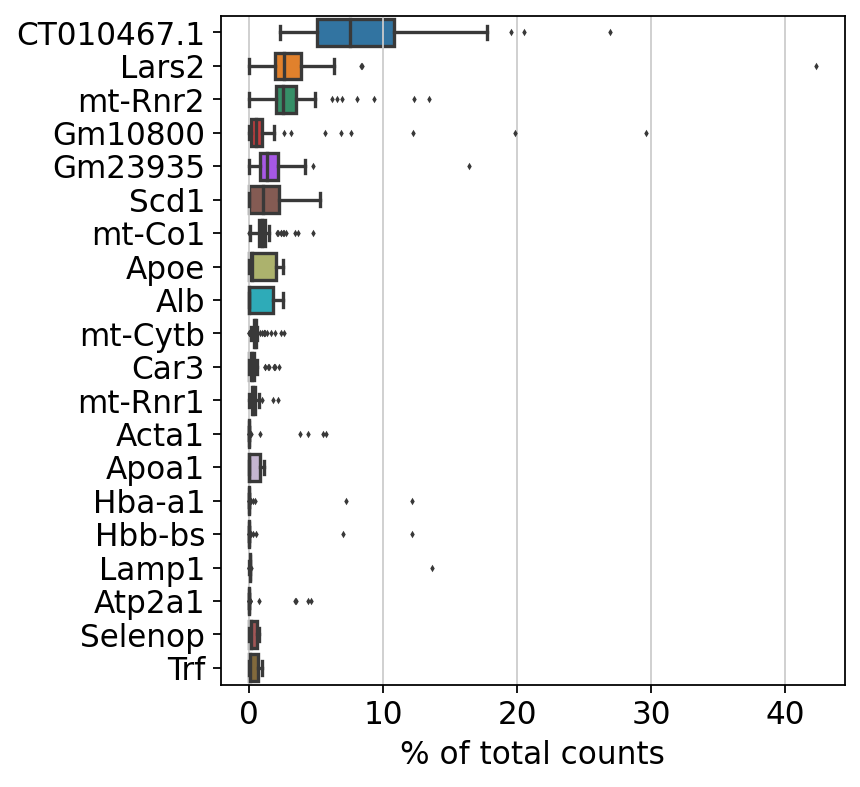

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [14]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/bulk_data/kidney_aging//liver_bulk_processed.h5ad'

In [15]:
# write it out before normalization
del adata.raw
adata.write(results_file)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


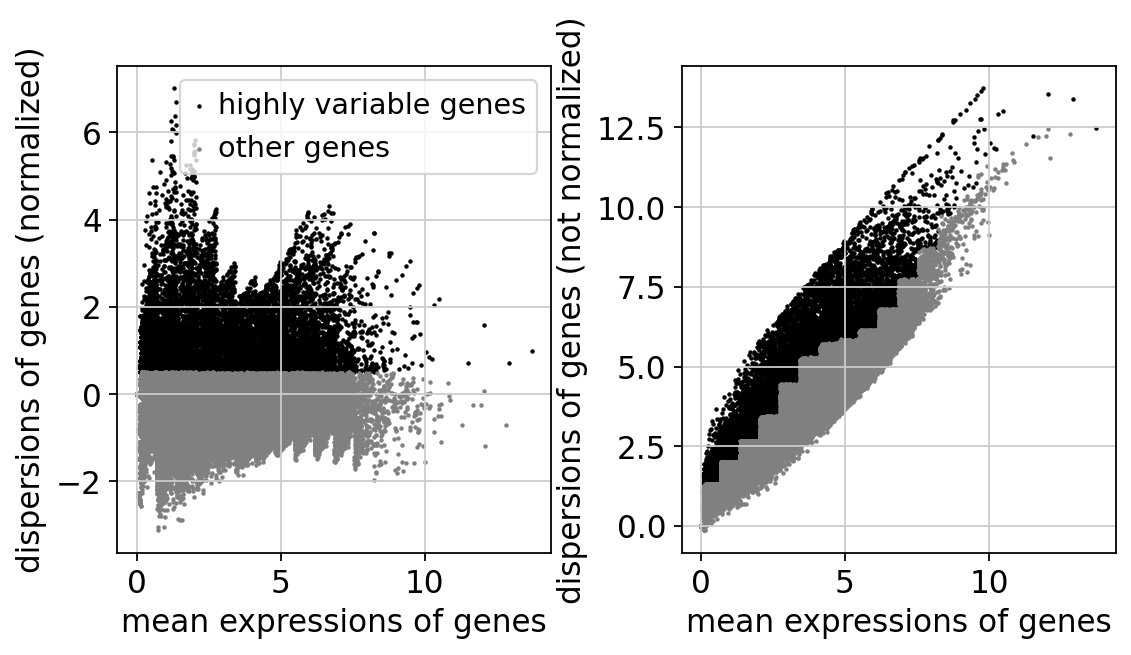

In [16]:
# normalize to 10K counts per cell
#sc.pp.normalize_total(adata, target_sum=1e6)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0, max_mean=15, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
#adata.raw = adata


In [17]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# scale the genes
sc.pp.scale(adata, max_value=20)

/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


## PCA

In [18]:
sc.tl.pca(adata, n_comps=10)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)


computing PCA
    on highly variable genes
    with n_comps=10
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)


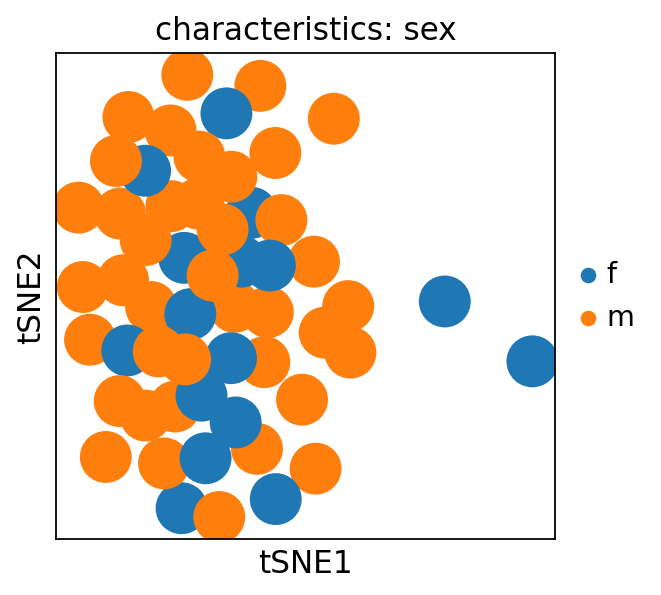

In [20]:
sc.pl.tsne(adata, color="characteristics: sex")

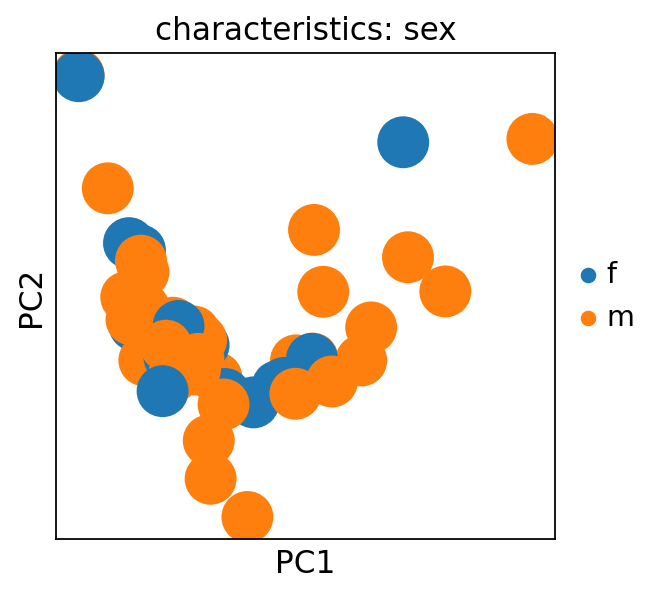

In [22]:
sc.pl.pca(adata, color="characteristics: sex")

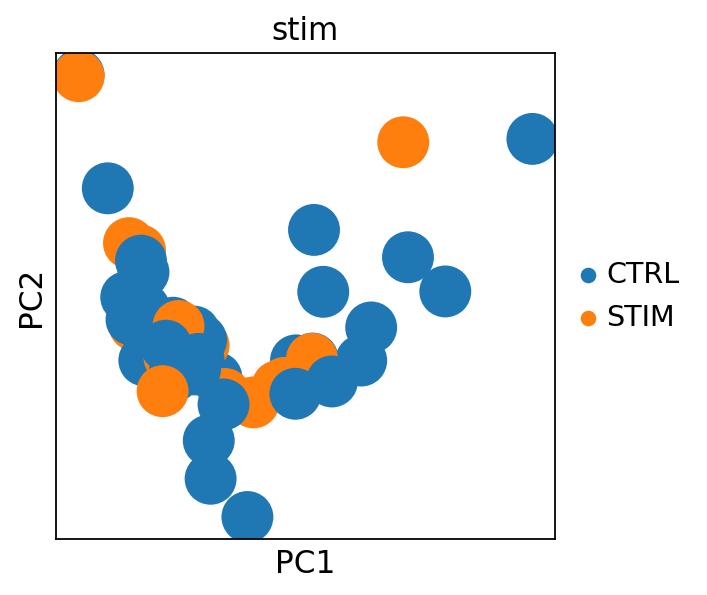

In [23]:
sc.pl.pca(adata, color="stim")

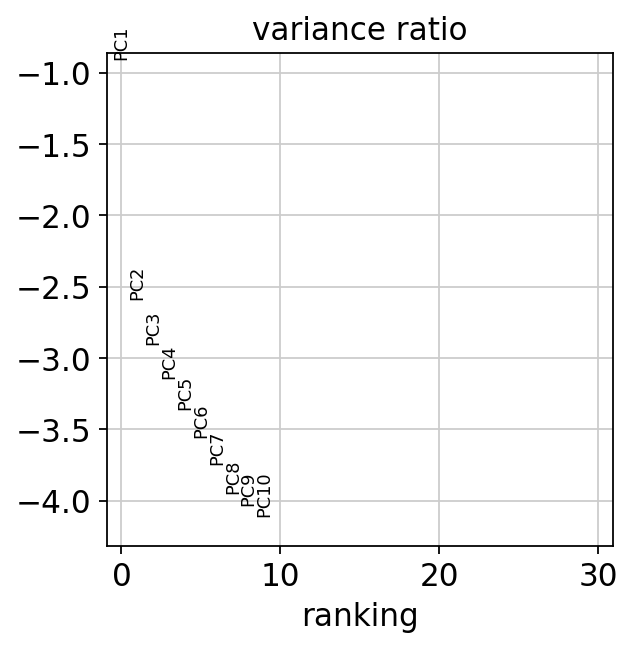

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)



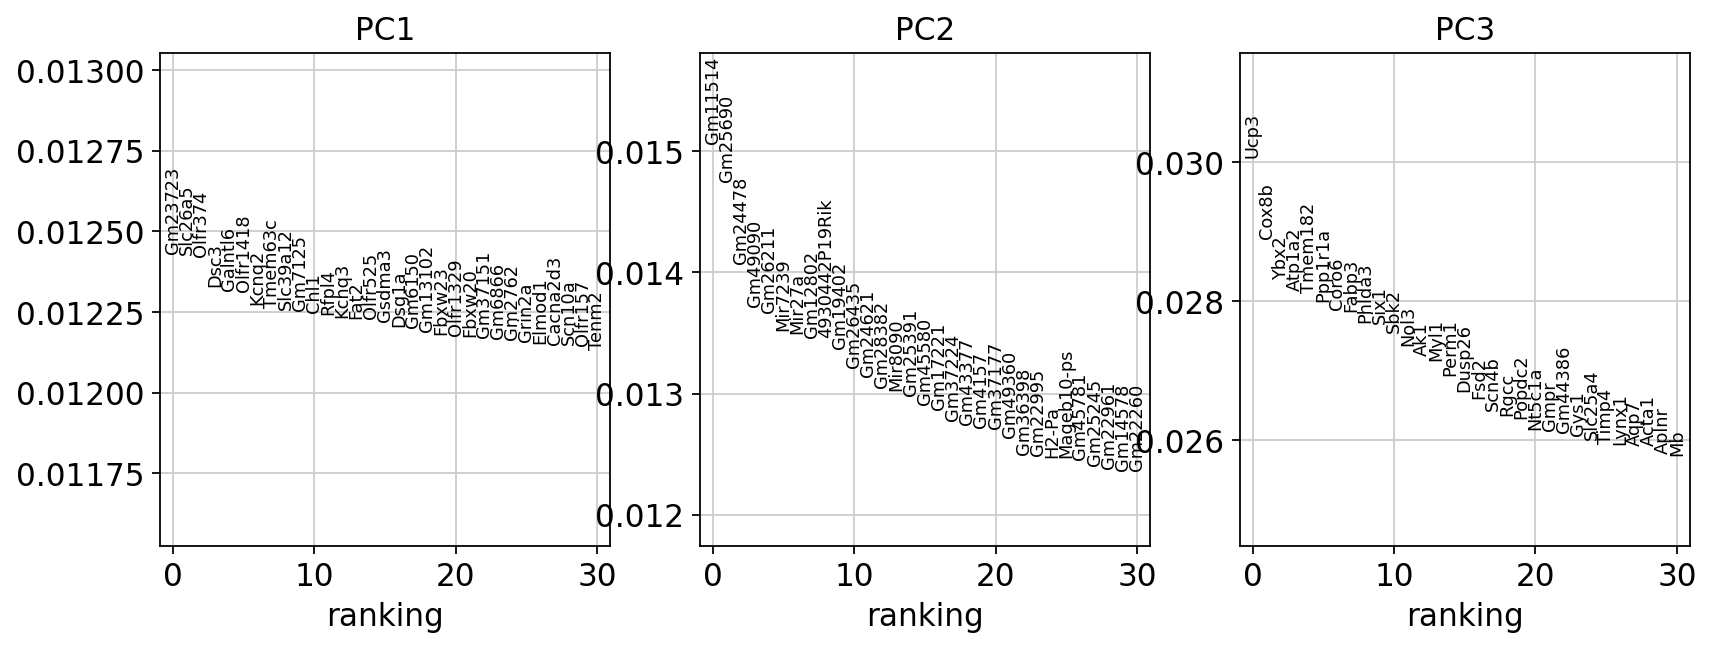

In [25]:
sc.pl.pca_loadings(adata, include_lowest=False)
